<a href="https://colab.research.google.com/github/sandeep-kumar-singh/emasters_ee954/blob/main/EE954_Assignment_TRYOUTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
1. Download the Fashion_MNIST dataset. You can find it on the official Fashion-MNIST website or by using PyTorch's torchvision.datasets module. Split the dataset into training, validation and testing sets. A common split is 80% of the data to train, 10% to validate, and 10% to test scenarios, but you can adjust this as needed. Normalize the images. This involves scaling the pixel values to a range between 0 and 1.

2. Implement a MLP for classification. (total 40 marks)
    <ol type="a">
    <li>Flatten the images into a single dimensional vector before feeding it to the model. (1 marks)</li>
    <li>Write a pre-processing module for all the images. (3 marks)</li>
    <li>Write the Forward pass from scratch. Use of the inbuilt forward pass function will result in 0 marks for this sub-question. (8 marks)</li>
    <li>Write the Backward pass from scratch. Use the inbuilt back propagation function will result in 0 marks for this sub-question (12 marks)</li>
    <li>Write the module for cross entropy loss (1 marks)</li>
    <li>Experiment with different hyperparameters like number of layers, dropout, objective function, etc. and settle with a combination which performs the best for the given problem. (15 Marks)</li>
    </ol>

3. Implement a [CNN backbone model](https://www.baeldung.com/cs/neural-network-backbone) using pytorch. (total 40 marks)
    <ol type="a">
    <li>Build a small CNN model consisting of 5 convolution layers. Each convolution layer would be followed by a ReLU activation and a max pooling layer. (10 Marks )</li>
    <li>Experiment with different kernel size, number of kernel each layer (keep number of filter same in each layer, double it in each layer etc) and settle with a combination which performs the best for the given problem. (10 Marks)</li>
    <li>Try different weight initialization methods (random, Xavier, He) (5 Marks)</li>
    <li>After extracting feature from CNN model use MLP for classification (use code from question 2) (15 Marks)</li>
    </ol>

4. Submit a report clearly explaining how you have built the models, the architecture of the models, learning rate, epochs used for training, evaluation metrics and the instructions for running the models. Compare the performance of the models on the different hyperparameters you tried and justify the observed behavior. (20 Marks)

# Part 1 - Data Preparation

In [ ]:
# ==========================================================
# Import Dependencies
# ==========================================================

# for MLP
import numpy as np

# for Pytorch based backbone CNN
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [ ]:
# ==========================================================
# Data Preparation (using torch)
# ==========================================================

# PyTorch based flow to prepare and train a backbone CNN
########################################################
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),                                                       # this transform does the normalisation of data from [1,255] to [0.0, 1.0]
)
# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),                                                       # this transform does the normalisation of data from [1,255] to [0.0, 1.0]
)

# Split the training data into Training and Validation datasets
training_data_subset_size = int(0.8 * len(training_data))
validate_data_subset_size = len(training_data) - training_data_subset_size
training_data_subset, validation_data_subset = random_split(training_data, [training_data_subset_size, validate_data_subset_size])

# define batch-size to load data
batch_size = 64
# define num of epochs to be run for training
epochs = 10

# Create data loaders.
train_dataloader = DataLoader(training_data_subset, batch_size=batch_size)
validate_dataloader = DataLoader(validation_data_subset, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

Using downloaded and verified file: data/FashionMNIST/raw/train-images-idx3-ubyte.gz
Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw

Using downloaded and verified file: data/FashionMNIST/raw/train-labels-idx1-ubyte.gz
Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Using downloaded and verified file: data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw

Using downloaded and verified file: data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# ==========================================================
# Data Preparation (Alternate using numpy)
# ==========================================================

import os
import gzip
import urllib.request
import numpy as np

# URL and data filename for the Fashion MNIST dataset
DATASET_BASE_URL = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com'
DATASET_BASE_FOLDER = './data/FashionMNIST/raw'
DATA_FILENAME = {
    'train_images': 'train-images-idx3-ubyte.gz',
    'train_labels': 'train-labels-idx1-ubyte.gz',
    'test_images': 't10k-images-idx3-ubyte.gz',
    'test_labels': 't10k-labels-idx1-ubyte.gz'
}

# Helper function to download and extract the dataset
def download_and_extract(filename, is_image=False):
    if not os.path.exists('/'.join([DATASET_BASE_FOLDER, filename])):
        os.makedirs(DATASET_BASE_FOLDER, exist_ok=True)
        urllib.request.urlretrieve('/'.join([DATASET_BASE_URL, filename]),
                                   '/'.join([DATASET_BASE_FOLDER, filename]))
    filename = os.path.join(DATASET_BASE_FOLDER, filename)
    with gzip.open(filename, 'rb') as f:
        if (is_image):
            return np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28 * 28) / 255.0
        else:
            return np.frombuffer(f.read(), np.uint8, offset=8)

# Download and extract all files
train_images__np = download_and_extract(DATA_FILENAME['train_images'], is_image=True)
train_labels__np = download_and_extract(DATA_FILENAME['train_labels'])
test_images__np = download_and_extract(DATA_FILENAME['test_images'], is_image=True)
test_labels__np = download_and_extract(DATA_FILENAME['test_labels'])

# Split the training set into training and validation sets
num_train = int(0.8 * len(train_images__np))
train_data__np, val_data__np = train_images__np[:num_train], train_images__np[num_train:]
train_labels__np, val_labels__np = train_labels__np[:num_train], train_labels__np[num_train:]

print(f'Training data shape   : Images - {train_data__np.shape} | Labels - {train_labels__np.shape}')
print(f'Validation data shape : Images - {val_data__np.shape} | Labels - {val_labels__np.shape}')
print(f'Test data shape       : Images - {test_images__np.shape} | Labels - {test_labels__np.shape}')

Training data shape   : Images - (48000, 784) | Labels - (48000,)
Validation data shape : Images - (12000, 784) | Labels - (12000,)
Test data shape       : Images - (10000, 784) | Labels - (10000,)


In [ ]:
# ==========================================================
# Select Device for Execution
# ==========================================================

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")



Using cpu device


In [ ]:
# ==========================================================
# Define MLP model for classification
# ==========================================================

# Define a class to represent dense layer
class DenseLayer:
    def __init__(self, input_dim, output_dim, activation, lambda_reg=0.1, reg_type=None):
        self.input_dim = input_dim
        self.output_dim = output_dim

        self.weights = np.random.randn(input_dim, output_dim) * 0.01
        self.biases =  np.zeros((1, output_dim))

        self.activation_name = activation
        self.lambda_reg = lambda_reg

        self.output = None
        self.input = None

        self.reg_type = reg_type

        if self.activation_name == 'relu':
            self.activation = self.relu
            self.activation_prime = self.relu_prime
        elif self.activation_name == 'sigmoid':
            self.activation = self.sigmoid
            self.activation_prime = self.sigmoid_prime
        elif self.activation_name == 'softmax':
            self.activation = self.softmax
            self.activation_prime = self.softmax_prime
        else:
            raise ValueError('activation function is not defined')

    def __str__(self):
        return f"""DenseLayer(input_dim:{self.input_dim}, output_dim:{self.output_dim}, activation:{self.activation_name})"""

    def forward(self, input_data):
        self.input = input_data
        #print(f"self.input: {self.input.shape} \n self.weights {self.weights.shape}")
        Z = np.dot(self.input, self.weights) + self.biases
        #print("Z ", Z.shape)
        self.output = self.activation(Z)
        #print(f"set..... self.output {self.output.shape}")

        return self.output

    def backward(self, dA, learning_rate, y=None):
        """
        Backward propagate through this layer.
        dA is the derivative of the loss with respect to the output of this layer.
        y is the true labels, which is only needed if this is an output layer with softmax activation.
        """
        #print(f"self.output {self.output.shape}")
        if self.activation_name == 'softmax':
            y_one_hot = np.zeros_like(self.output)
            y_one_hot[np.arange(len(y)), y] = 1
            # Calculate the derivative of the loss with respect to the softmax inputs
            # print(len(y))
            # print(self.output.shape)
            dZ = (self.output - y_one_hot)
            # print(f"before : {dZ.shape}, {dZ}")
            # dZ = dZ / len(y)                                                    # why divide????
            # print(f"after : {dZ.shape}, {dZ}")
        else:
            dZ = dA * self.activation_prime(self.output)

        dA_prev = np.dot(dZ, self.weights.T)
        dW = np.dot(self.input.T, dZ)
        db = np.sum(dZ, axis=0, keepdims=True)

        if self.reg_type:
            if self.reg_type.upper() == "L1":
                 #print("Using L1 regularization..")
                 weights_reg = self.lambda_reg * np.sign(self.weights)
                 biases_reg = self.lambda_reg * np.sign(self.biases)
            else:
                 #print("Using L2 regularization....")
                 weights_reg = self.lambda_reg * self.weights
                 biases_reg = self.lambda_reg * self.biases
            self.weights -= learning_rate * (dW + weights_reg)
            self.biases -= learning_rate * (db + biases_reg)
        else:
            #print("No regularization....")
            self.weights -= learning_rate * dW
            self.biases -= learning_rate * db

        return dA_prev

    # ==== Activation functions and their derivatives ====

    def relu(self, x):
        return np.maximum(0, x)

    def relu_prime(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_prime(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    # Ref https://stackoverflow.com/questions/40575841/numpy-calculate-the-derivative-of-the-softmax-function
    def softmax(self,Z):
        exp_scores = np.exp(Z)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # Softmax activation

    # The derivative of the cross-entropy loss with respect to the input to the softmax is simply predictions - true_labels
    def softmax_prime(self,x):
        return None                 # NotImplemented because not used/required in current architecture


# Define a class to represent MLP
class MLP:
    def __init__(self):
        self.layers = []
        self.history = {'train_loss': [], 'val_loss': [], 'train_acc':[], 'val_acc':[]}

    def add_layer(self, layer):
        self.layers.append(layer)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self,output, learning_rate, y_train_batch):
        i = 0
        for layer in reversed(self.layers):

            #print(layer)
            # print(f"{i}, =====================")
            i += 1
            output = layer.backward(output, learning_rate, y_train_batch)

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

    def cross_entropy_loss(self,y, output):
        m = y.shape[0]
        log_likelihood = -np.log(output[range(m), y] + 1e-9)
        loss = np.sum(log_likelihood) / m
        return loss

    def train(self, train_data, train_labels, val_data, val_labels, epochs=10, batch_size=64, learning_rate=0.01):
        for epoch in range(epochs):
            permutation = np.random.permutation(train_data.shape[0])
            train_data = train_data[permutation]
            train_labels = train_labels[permutation]
            for i in range(0, train_data.shape[0], batch_size):
                X_batch = train_data[i:i+batch_size]
                y_batch = train_labels[i:i+batch_size]
                output = self.forward(X_batch)
                self.backward(output, learning_rate, y_batch)
            train_loss = self.cross_entropy_loss(train_labels, self.forward(train_data))
            self.history['train_loss'].append(train_loss)

            val_output = self.forward(val_data)
            val_loss = self.cross_entropy_loss(val_labels, val_output)  # Use val_labels directly
            self.history['val_loss'].append(val_loss)

            val_accuracy = np.mean(self.predict(val_data) == val_labels)
            train_acc = np.mean(self.predict(train_data) == train_labels)
            self.history['train_acc'].append(train_acc)
            self.history['val_acc'].append(val_accuracy)
            print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

#####################################


In [ ]:
# define the MLP architecture
input_size = 28 * 28
hidden_size = 128
output_size = 10

# create the instance of MLP
mlp = MLP()
mlp.add_layer(DenseLayer(input_size, hidden_size, 'relu'))      #reg_type="L2" does not help
mlp.add_layer(DenseLayer(hidden_size, output_size, 'softmax'))  #reg_type="L2" does not help

epochs = 1
learning_rate = 0.01
print("Training the classigication MLP model")
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    # mlp.train(train_data__np[0:5], train_labels__np[0:5], val_data__np[0:5], val_labels__np[0:5], batch_size=5)
    mlp.train(train_data__np, train_labels__np, val_data__np, val_labels__np)


Training the classigication MLP model
Epoch 1
-------------------------------
Epoch 1, Training Loss: 0.6765, Validation Loss: 0.6780, Validation Accuracy: 0.7585
Epoch 2, Training Loss: 0.5844, Validation Loss: 0.6009, Validation Accuracy: 0.7562
Epoch 3, Training Loss: 0.6446, Validation Loss: 0.6655, Validation Accuracy: 0.7374
Epoch 4, Training Loss: 0.5159, Validation Loss: 0.5460, Validation Accuracy: 0.8048
Epoch 5, Training Loss: 0.5236, Validation Loss: 0.5660, Validation Accuracy: 0.7933
Epoch 6, Training Loss: 0.5538, Validation Loss: 0.5926, Validation Accuracy: 0.7741
Epoch 7, Training Loss: 0.4077, Validation Loss: 0.4470, Validation Accuracy: 0.8438
Epoch 8, Training Loss: 0.3694, Validation Loss: 0.4216, Validation Accuracy: 0.8446
Epoch 9, Training Loss: 0.4415, Validation Loss: 0.4967, Validation Accuracy: 0.8032
Epoch 10, Training Loss: 0.3417, Validation Loss: 0.4082, Validation Accuracy: 0.8523


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# For Debugging - CNN Layer Output Size
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# input = torch.randn(784, 3, 3)

# # m = nn.Conv2d(392, 784, (2, 2), stride=(1, 1), padding=(1, 1))
# m = nn.MaxPool2d((2, 2))
# output = m(input)

# print(input.size(), output.size())

torch.Size([784, 3, 3]) torch.Size([784, 1, 1])


In [ ]:
# ==========================================================
# Define backbone CNN model for feature extraction
# ==========================================================

class BackboneNeuralNetwork(nn.Module):
    """
    Build a small CNN model consisting of 5 convolution layers. Each convolution
    layer would be followed by a ReLU activation and a max pooling layer.

    Dense network with 2 layers, with a ReLU activation after first layer. This
    layer can be used ONLY when testing CNN model in isolation. After extracting
    feature from CNN model, use MLP for classification.

    NOTE: Dense network is not used, if `backbone_only` is `True`.

    REFERENCES:
        1. https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html
        nn.Sequential()

        2. https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d
        nn.Conv2d(
            in_channels = number of layers in input images. Grayscale or monochrome images have 1 in_channels
            out_channels = number of channels in the output produced. This is a hyperparameter, which signifies the number of kernels
            kernel_size = `(m,n)` for a kernel/filter dimension, or simply n for a square (n,n) kernel/filter dimension
            stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None are other properties with default values
        )

        3. https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU
        nn.ReLU()

        4. https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d
        nn.MaxPool2d(
            kernel_size = `(m,n)` for a kernel/filter dimension, or simply n for a square (n,n) kernel/filter dimension
            stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False are other properties with default values
        )

        5. https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
        nn.Linear(
            in_features = size of each input sample
            out_features = size of each output sample
            bias=True, device=None, dtype=None are other properties with default values
        )

        6. https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax
        nn.Softmax()

        7. https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
        Training a Classifier
    """

    # Constructor for the CNN Model.
    #
    # NOTE: If `backbone_only` is `True`, dense network is not used.
    def __init__(self, backbone_only=False):
        super().__init__()

        # this property helps the CNN transition from a full-fledged network to a backbone CNN
        # the default value is False - meaning an object of this class can be used to predict the labels for Fashion-MNIST dataset
        # if the value is set to True - an object of this class will return the flattened output from conv layers - thus acting as a backbone
        self.backbone_only = backbone_only

        self.flatten = nn.Flatten()

        # CNN model consisting of 5 convolution layers with each convolution
        # layer followed by a ReLU activation and a max pooling layer.
        self.convolutional_relu_stack = nn.Sequential(
            nn.Conv2d(1, 49, (3, 3), stride=(1, 1), padding=(1, 1)),    # input = (1,28,28), output = (49, 28, 28)
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),                                       # input = (49, 28, 28), output = (49, 14, 14)
            nn.Conv2d(49, 98, (2, 2), stride=(1, 1), padding=(1,1)),    # input = (49, 14, 14), output = (98, 15, 15)
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),                                       # input = (98, 15, 15), output = (98, 7, 7)
            nn.Conv2d(98, 196, (2, 2), stride=(1, 1), padding=(1,1)),   # input = (98, 7, 7), output = (196, 8, 8)
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),                                       # input = (196, 8, 8), output = (196, 4, 4)
            nn.Conv2d(196, 392, (2, 2), stride=(1, 1), padding=(1, 1)), # input = (196, 4, 4), output = (392, 5, 5)
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),                                       # input = (392, 5, 5), output = (392, 2, 2)
            nn.Conv2d(392, 784, (2, 2), stride=(1, 1), padding=(1, 1)), # input = (392, 2, 2), output = (784, 3, 3)
            nn.ReLU(),
            nn.MaxPool2d((2, 2))                                        # input = (784, 3, 3), output = (784,1,1)
        )

        # Dense network with 2 layers with a ReLU activation after first layer.
        # This layer can be used ONLY when testing CNN model in isolation.
        #
        # NOTE: Dense network is not used, if `backbone_only` is `True`.
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    # Forward pass for CNN Model
    def forward(self, x):
        # print(f'CNN Input Size: {x.size()}')
        x1 = self.convolutional_relu_stack(x)
        # print(f'CNN Output Size: {x1.size()}')
        x2 = self.flatten(x1)
        # print(f'Flatten Size: {x2.size()}')

        if self.backbone_only:  # return the flattened tensor containing feature extraction data
            return x2

        # default behaviour is to return the predicted labels
        x3 = self.linear_relu_stack(x2)
        return x3

In [ ]:

# create model instance
model = BackboneNeuralNetwork().to(device)
# print(model)

# define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# forward pass implementation
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        optimizer.zero_grad()
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


# validation implementation
def validate(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    validation_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            validation_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    validation_loss /= num_batches
    correct /= size
    print(f"Validation Phase: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {validation_loss:>8f} \n")

# testing implementation
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Phase: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# Train and Validate the CNN
print("Training the backbone CNN model")
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    validate(validate_dataloader, model, loss_fn)
print("Done!")

# Save the model
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch CNN backbone model state to model.pth")

# Load the model to perform testing on the trained variables
model = BackboneNeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

# Test with the model
test(test_dataloader, model, loss_fn)

#####################################
# Once the backbone model is prepared, trained, and tested,
# start the integration of backbone model with custom MLP

# define the MLP architecture
input_size = 28 * 28
hidden_size = 128
output_size = 10

# create the instance of MLP
mlp = MLP()
mlp.add_layer(DenseLayer(input_size, hidden_size, 'relu'))      #reg_type="L2" does not help
mlp.add_layer(DenseLayer(hidden_size, output_size, 'softmax'))  #reg_type="L2" does not help

# train the MLP using features extracted from pre-trained backbone
def feature_extraction(dataloader, model):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    features = np.empty((size, 28*28), dtype=np.float64)
    labels = np.empty((size), dtype=np.int64)
    model.eval()
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            pred = model(X)
            features[(batch*batch_size):((batch+1)*batch_size)] = pred.numpy()  # extract the features in numpy arrays
            labels[(batch*batch_size):((batch+1)*batch_size)] = y.numpy()       # extract the features in numpy arrays
    return features, labels

# create the instance of `backbone CNN model`
backbone_model = BackboneNeuralNetwork(backbone_only=True).to(device)
backbone_model.load_state_dict(torch.load("model.pth"))

# extract the features using backbone CNN
classifier_train_data, classifier_train_labels = feature_extraction(train_dataloader, backbone_model)
classifier_validation_data, classifier_validation_labels = feature_extraction(validate_dataloader, backbone_model)

# let the MLP classify the data now based on feature-extracted dataset
epochs = 1
learning_rate = 0.01
print("Training the classigication MLP model")
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    mlp.train(classifier_train_data, classifier_train_labels, classifier_validation_data, classifier_validation_labels)


Streaming output truncated to the last 5000 lines.
CNN Output Size: torch.Size([64, 784, 1, 1])
Flatten Size: torch.Size([64, 784])
CNN Input Size: torch.Size([64, 1, 28, 28])
CNN Output Size: torch.Size([64, 784, 1, 1])
Flatten Size: torch.Size([64, 784])
CNN Input Size: torch.Size([64, 1, 28, 28])
CNN Output Size: torch.Size([64, 784, 1, 1])
Flatten Size: torch.Size([64, 784])
CNN Input Size: torch.Size([64, 1, 28, 28])
CNN Output Size: torch.Size([64, 784, 1, 1])
Flatten Size: torch.Size([64, 784])
CNN Input Size: torch.Size([64, 1, 28, 28])
CNN Output Size: torch.Size([64, 784, 1, 1])
Flatten Size: torch.Size([64, 784])
CNN Input Size: torch.Size([64, 1, 28, 28])
CNN Output Size: torch.Size([64, 784, 1, 1])
Flatten Size: torch.Size([64, 784])
CNN Input Size: torch.Size([64, 1, 28, 28])
CNN Output Size: torch.Size([64, 784, 1, 1])
Flatten Size: torch.Size([64, 784])
CNN Input Size: torch.Size([64, 1, 28, 28])
CNN Output Size: torch.Size([64, 784, 1, 1])
Flatten Size: torch.Size([64,

# TO BE REMOVED

In [ ]:
!mv ./data ./data_bak

In [ ]:
import os
import gzip
import urllib.request
import numpy as np

# URL and data filename for the Fashion MNIST dataset
DATASET_BASE_URL = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com'
DATASET_BASE_FOLDER = './data/FashionMNIST/raw'
DATA_FILENAME = {
    'train_images': 'train-images-idx3-ubyte.gz',
    'train_labels': 'train-labels-idx1-ubyte.gz',
    'test_images': 't10k-images-idx3-ubyte.gz',
    'test_labels': 't10k-labels-idx1-ubyte.gz'
}

# Helper function to download and extract the dataset
def download_and_extract(filename, is_image=False):
    if not os.path.exists('/'.join([DATASET_BASE_FOLDER, filename])):
        os.makedirs(DATASET_BASE_FOLDER, exist_ok=True)
        urllib.request.urlretrieve('/'.join([DATASET_BASE_URL, filename]),
                                   '/'.join([DATASET_BASE_FOLDER, filename]))
    filename = os.path.join(DATASET_BASE_FOLDER, filename)
    with gzip.open(filename, 'rb') as f:
        if (is_image):
            return np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28 * 28) / 255.0
        else:
            return np.frombuffer(f.read(), np.uint8, offset=8)

# Download and extract all files
train_images = download_and_extract(DATA_FILENAME['train_images'], is_image=True)
train_labels = download_and_extract(DATA_FILENAME['train_labels'])
test_images = download_and_extract(DATA_FILENAME['test_images'], is_image=True)
test_labels = download_and_extract(DATA_FILENAME['test_labels'])

# Split the training set into training and validation sets
num_train = int(0.8 * len(train_images))
train_data, val_data = train_images[:num_train], train_images[num_train:]
train_labels, val_labels = train_labels[:num_train], train_labels[num_train:]

print(f'Training data shape   : Images - {train_data.shape} | Labels - {train_labels.shape}')
print(f'Validation data shape : Images - {val_data.shape} | Labels - {val_labels.shape}')
print(f'Test data shape       : Images - {test_images.shape} | Labels - {test_labels.shape}')


Training data shape   : Images - (48000, 784) | Labels - (48000,)
Validation data shape : Images - (12000, 784) | Labels - (12000,)
Test data shape       : Images - (10000, 784) | Labels - (10000,)


# Part 2 - MLP Implementation

In [ ]:
import matplotlib.pyplot as plt

# Define the MLP model
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = np.maximum(0, self.Z1)  # ReLU activation
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        exp_scores = np.exp(self.Z2)
        self.A2 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # Softmax activation
        return self.A2

    def backward(self, X, y, output, learning_rate=0.01):
        m = y.shape[0]
        grad_Z2 = output
        grad_Z2[range(m), y] -= 1
        grad_Z2 /= m

        grad_W2 = np.dot(self.A1.T, grad_Z2)
        grad_b2 = np.sum(grad_Z2, axis=0, keepdims=True)
        grad_A1 = np.dot(grad_Z2, self.W2.T)
        grad_Z1 = grad_A1 * (self.Z1 > 0)
        grad_W1 = np.dot(X.T, grad_Z1)
        grad_b1 = np.sum(grad_Z1, axis=0, keepdims=True)

        self.W1 -= learning_rate * grad_W1
        self.b1 -= learning_rate * grad_b1
        self.W2 -= learning_rate * grad_W2
        self.b2 -= learning_rate * grad_b2

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# Loss function: Cross entropy loss
def cross_entropy_loss(y, output):
    m = y.shape[0]
    print(f'm: {m}')
    log_likelihood = -np.log(output[range(m), y] + 1e-9)
    print(f'log likelihood: {log_likelihood.shape}')
    loss = np.sum(log_likelihood) / m
    return loss

# def cross_entropy_loss(y, output):
#     # Small constant to prevent log(0) error
#     epsilon = 1e-9
#     # Clip values to range to avoid log(0)
#     #y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
#     # Calculate cross-entropy loss
#     N = y.shape[0]
#     print(f'y.shape: {y.shape} | output: {output[[range(N), y]]}')
#     ce_loss = -np.sum(y * np.log(output[range(N), y] + epsilon)) / N
#     return ce_loss

# One-hot encode the labels
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

# Convert labels to one-hot encoding
train_labels_one_hot = one_hot(train_labels, 10)
val_labels_one_hot = one_hot(val_labels, 10)


def train(model, train_data, train_labels, val_data, val_labels, epochs=10, batch_size=64, learning_rate=0.01):

  training_losses = []
  validation_losses = []
  for epoch in range(epochs):
    permutation = np.random.permutation(train_data.shape[0])
    train_data = train_data[permutation]
    train_labels = train_labels[permutation]

    train_output = np.zeros_like(train_labels)
    val_output = np.zeros_like(val_labels)

    for i in range(0, train_data.shape[0], batch_size):
      X_batch = train_data[i:i+batch_size]
      y_batch = train_labels[i:i+batch_size]

      train_output[i] = model.forward(X_batch)
      model.backward(X_batch, y_batch, train_output[i], learning_rate)

    train_loss = cross_entropy_loss(train_labels, train_output)
    training_losses.append(train_loss)

    val_output = model.forward(val_data)
    val_loss = cross_entropy_loss(val_labels, val_output)  # Use val_labels directly
    validation_losses.append(val_loss)

    val_accuracy = np.mean(model.predict(val_data) == val_labels)

    print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Plot training vs validation loss
  plt.plot(training_losses, label='Training Loss')
  plt.plot(validation_losses, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

# Hyperparameters
input_size = 28 * 28
hidden_size = 128
output_size = 10
epochs = 20
learning_rate = 0.01

# def preprocess_images(images):
#     return images.reshape(-1, 28 * 28) / 255.0

# Instantiate and train the model
model = MLP(input_size, hidden_size, output_size)
train(model, train_data, train_labels, val_data, val_labels, epochs=epochs, learning_rate=learning_rate)

# Test the model
test_output = model.forward(test_images)
test_accuracy = np.mean(model.predict(test_images) == test_labels)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Saving the model
def save_model(model, filename):
    np.savez(filename, W1=model.W1, b1=model.b1, W2=model.W2, b2=model.b2)

save_model(model, 'mlp_model.npz')

train_labels: (48000,)
train_output: (48000, 784)
model.forward(X_batch): [[0.10030812 0.09921891 0.10064403 0.10012314 0.10062392 0.0990807
  0.09855234 0.09853816 0.10122936 0.10168133]
 [0.1003623  0.09978658 0.09964169 0.09992482 0.100355   0.09986912
  0.09955656 0.09967179 0.10003001 0.10080212]
 [0.10047218 0.09977374 0.0995427  0.10029408 0.10062794 0.09959224
  0.09930976 0.099556   0.10024347 0.10058789]
 [0.10057461 0.10017877 0.10057387 0.09961079 0.10038848 0.09908568
  0.0979472  0.09943483 0.10221432 0.09999146]
 [0.10094033 0.09972683 0.10063256 0.10021117 0.10117931 0.09849489
  0.09849878 0.0986252  0.10158148 0.10010946]
 [0.10056716 0.10015183 0.09956531 0.09954895 0.10108571 0.09958902
  0.09832613 0.09927663 0.10154627 0.10034299]
 [0.10051119 0.0996277  0.09975878 0.10024056 0.10085091 0.09896452
  0.09953833 0.09933711 0.10110337 0.10006753]
 [0.10037    0.10029541 0.10002703 0.09994206 0.10032851 0.09978856
  0.09923881 0.09970807 0.10062952 0.09967203]
 [0.100

ValueError: could not broadcast input array from shape (64,10) into shape (784,)

In [ ]:
!pip install graphviz pydot

In [ ]:
# Load the saved model
loaded_model = np.load('mlp_model.npz')
W1 = loaded_model['W1']
b1 = loaded_model['b1']
W2 = loaded_model['W2']
b2 = loaded_model['b2']


# Create a new instance of the MLP with the loaded weights and biases
loaded_mlp = MLP(input_size, hidden_size, output_size)
loaded_mlp.W1 = W1
loaded_mlp.b1 = b1
loaded_mlp.W2 = W2
loaded_mlp.b2 = b2


# Use the loaded model for inference
test_output = loaded_mlp.forward(test_images)
test_predictions = np.argmax(test_output, axis=1)
test_accuracy = np.mean(test_predictions == test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 84.26%


Epoch 1, Training Loss: 1.5644, Validation Loss: 1.5599, Validation Accuracy: 0.4216
Epoch 2, Training Loss: 1.0399, Validation Loss: 1.0328, Validation Accuracy: 0.6084
Epoch 3, Training Loss: 0.8782, Validation Loss: 0.8658, Validation Accuracy: 0.6698
Epoch 4, Training Loss: 0.8213, Validation Loss: 0.8149, Validation Accuracy: 0.6929
Epoch 5, Training Loss: 0.7882, Validation Loss: 0.7760, Validation Accuracy: 0.7018
Epoch 6, Training Loss: 0.7220, Validation Loss: 0.7127, Validation Accuracy: 0.7483
Epoch 7, Training Loss: 0.7151, Validation Loss: 0.7102, Validation Accuracy: 0.7283
Epoch 8, Training Loss: 0.6748, Validation Loss: 0.6699, Validation Accuracy: 0.7612
Epoch 9, Training Loss: 0.7635, Validation Loss: 0.7746, Validation Accuracy: 0.6902
Epoch 10, Training Loss: 0.6492, Validation Loss: 0.6516, Validation Accuracy: 0.7626
Epoch 11, Training Loss: 0.6486, Validation Loss: 0.6460, Validation Accuracy: 0.7448
Epoch 12, Training Loss: 0.6237, Validation Loss: 0.6250, Valid

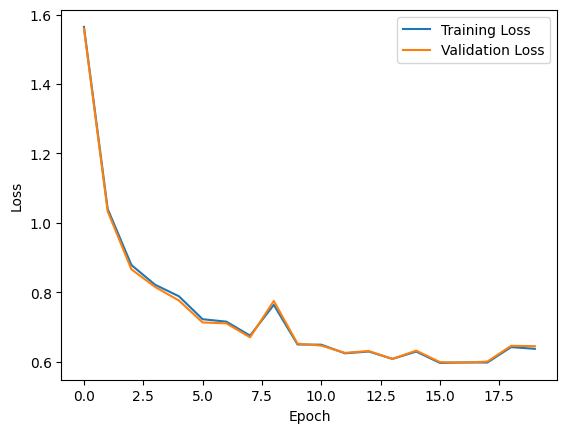

Test Accuracy: 0.7307


In [ ]:
import numpy as np
import urllib.request
import gzip
import os
import matplotlib.pyplot as plt

# Helper function to download and extract the dataset
def download_and_extract(url, filename):
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url, filename)
    with gzip.open(filename, 'rb') as f:
        return np.frombuffer(f.read(), np.uint8, offset=16)

# Helper function to download and extract labels
def download_and_extract_labels(url, filename):
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url, filename)
    with gzip.open(filename, 'rb') as f:
        return np.frombuffer(f.read(), np.uint8, offset=8)

# URLs for the Fashion MNIST dataset
urls = {
    'train_images': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz',
    'train_labels': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz',
    'test_images': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz',
    'test_labels': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz'
}

# Download and extract all files
train_images = download_and_extract(urls['train_images'], 'train-images-idx3-ubyte.gz').reshape(-1, 28*28) / 255.0
train_labels = download_and_extract_labels(urls['train_labels'], 'train-labels-idx1-ubyte.gz')
test_images = download_and_extract(urls['test_images'], 't10k-images-idx3-ubyte.gz').reshape(-1, 28*28) / 255.0
test_labels = download_and_extract_labels(urls['test_labels'], 't10k-labels-idx1-ubyte.gz')

# Split the training set into training and validation sets
num_train = int(0.8 * len(train_images))
train_data, val_data = train_images[:num_train], train_images[num_train:]
train_labels, val_labels = train_labels[:num_train], train_labels[num_train:]

# Define the MLP model with more complexity and regularization
class MLP:
    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate=0.5, l2_reg=0.01):
        self.W1 = np.random.randn(input_size, hidden_sizes[0]) * 0.01
        self.b1 = np.zeros((1, hidden_sizes[0]))
        self.W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) * 0.01
        self.b2 = np.zeros((1, hidden_sizes[1]))
        self.W3 = np.random.randn(hidden_sizes[1], output_size) * 0.01
        self.b3 = np.zeros((1, output_size))
        self.dropout_rate = dropout_rate
        self.l2_reg = l2_reg

    def forward(self, X, training=True):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = np.maximum(0, self.Z1)  # ReLU activation
        if training:
            self.U1 = (np.random.rand(*self.A1.shape) < (1 - self.dropout_rate)) / (1 - self.dropout_rate)
            self.A1 *= self.U1  # Apply dropout during training

        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = np.maximum(0, self.Z2)  # ReLU activation
        if training:
            self.U2 = (np.random.rand(*self.A2.shape) < (1 - self.dropout_rate)) / (1 - self.dropout_rate)
            self.A2 *= self.U2  # Apply dropout during training

        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        exp_scores = np.exp(self.Z3)
        self.A3 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # Softmax activation
        return self.A3

    def backward(self, X, y, output, learning_rate=0.01):
        m = y.shape[0]
        grad_Z3 = output
        grad_Z3[range(m), y] -= 1
        grad_Z3 /= m

        grad_W3 = np.dot(self.A2.T, grad_Z3) + self.l2_reg * self.W3
        grad_b3 = np.sum(grad_Z3, axis=0, keepdims=True)
        grad_A2 = np.dot(grad_Z3, self.W3.T)
        grad_Z2 = grad_A2 * (self.Z2 > 0)
        grad_W2 = np.dot(self.A1.T, grad_Z2) + self.l2_reg * self.W2
        grad_b2 = np.sum(grad_Z2, axis=0, keepdims=True)
        grad_A1 = np.dot(grad_Z2, self.W2.T)
        grad_Z1 = grad_A1 * (self.Z1 > 0)
        grad_W1 = np.dot(X.T, grad_Z1) + self.l2_reg * self.W1
        grad_b1 = np.sum(grad_Z1, axis=0, keepdims=True)

        self.W1 -= learning_rate * grad_W1
        self.b1 -= learning_rate * grad_b1
        self.W2 -= learning_rate * grad_W2
        self.b2 -= learning_rate * grad_b2
        self.W3 -= learning_rate * grad_W3
        self.b3 -= learning_rate * grad_b3

    def predict(self, X):
        output = self.forward(X, training=False)
        return np.argmax(output, axis=1)

# Loss function: Cross entropy loss
def cross_entropy_loss(y, output):
    m = y.shape[0]
    log_likelihood = -np.log(output[range(m), y] + 1e-9)
    loss = np.sum(log_likelihood) / m
    return loss

# One-hot encode the labels
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

# Convert labels to one-hot encoding
train_labels_one_hot = one_hot(train_labels, 10)
val_labels_one_hot = one_hot(val_labels, 10)

def train(model, train_data, train_labels, val_data, val_labels, epochs=10, batch_size=32, learning_rate=0.01):
    training_losses = []
    validation_losses = []
    for epoch in range(epochs):
        permutation = np.random.permutation(train_data.shape[0])
        train_data = train_data[permutation]
        train_labels = train_labels[permutation]

        for i in range(0, train_data.shape[0], batch_size):
            X_batch = train_data[i:i+batch_size]
            y_batch = train_labels[i:i+batch_size]

            output = model.forward(X_batch)
            model.backward(X_batch, y_batch, output, learning_rate)

        train_loss = cross_entropy_loss(train_labels, model.forward(train_data, training=False))
        training_losses.append(train_loss)

        val_output = model.forward(val_data, training=False)
        val_loss = cross_entropy_loss(val_labels, val_output)
        validation_losses.append(val_loss)

        val_accuracy = np.mean(model.predict(val_data) == val_labels)

        print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # Plot training vs validation loss
    plt.plot(training_losses, label='Training Loss')
    plt.plot(validation_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Hyperparameters
input_size = 28 * 28
hidden_sizes = [256, 128]
output_size = 10
epochs = 20
learning_rate = 0.01
dropout_rate = 0.5
l2_reg = 0.01

def preprocess_images(images):
    return images.reshape(-1, 28 * 28) / 255.0

# Instantiate and train the model
model = MLP(input_size, hidden_sizes, output_size, dropout_rate, l2_reg)
train(model, train_data, train_labels, val_data, val_labels, epochs=epochs, learning_rate=learning_rate)

# Test the model
test_output = model.forward(test_images, training=False)
test_accuracy = np.mean(model.predict(test_images) == test_labels)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Saving the model
def save_model(model, filename):
    np.savez(filename, W1=model.W1, b1=model.b1, W2=model.W2, b2=model.b2, W3=model.W3, b3=model.b3)

save_model(model, 'mlp_model_complex.npz')



In [ ]:
# Load the saved model
loaded_model = np.load('mlp_model_complex.npz')
W1 = loaded_model['W1']
b1 = loaded_model['b1']
W2 = loaded_model['W2']
b2 = loaded_model['b2']
W3 = loaded_model['W3']
b3 = loaded_model['b3']

# Create a new instance of the MLP with the loaded weights and biases
loaded_mlp = MLP(input_size, hidden_sizes, output_size, dropout_rate, l2_reg)
loaded_mlp.W1 = W1
loaded_mlp.b1 = b1
loaded_mlp.W2 = W2
loaded_mlp.b2 = b2
loaded_mlp.W3 = W3
loaded_mlp.b3 = b3

# Use the loaded model for inference
test_output = loaded_mlp.forward(test_images, training=False)
test_predictions = np.argmax(test_output, axis=1)
test_accuracy = np.mean(test_predictions == test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 73.07%


In [ ]:
import pydot
from IPython.display import Image, display
from graphviz import Digraph

def plot_mlp(input_size, hidden_size, output_size):
    dot = Digraph()

    # Add input layer nodes
    for i in range(1, input_size + 1):
        dot.node(f'input_{i}', label='Input', shape='circle')

    # Add hidden layer nodes
    for j in range(hidden_size):
        dot.node(f'hidden_{j}', label='Hidden', shape='circle')

    # Add output layer nodes
    for k in range(output_size):
        dot.node(f'output_{k}', label='Output', shape='circle')

    # Add edges
    for i in range(1, input_size + 1):
      for j in range(hidden_size):
        dot.edge(f'input_{i}', f'hidden_{j}')

    for j in range(hidden_size):
      for k in range(output_size):
        dot.edge(f'hidden_{j}', f'output_{k}')


    # Display the graph
    display(dot)

# Define the size of each layer
input_size = 28 * 28
hidden_size = 128
output_size = 10

# Plot the MLP model architecture
plot_mlp(input_size, hidden_size, output_size)


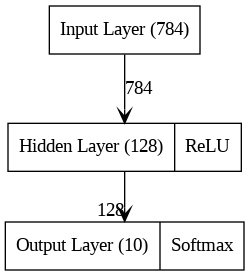

In [ ]:
import pydot
from IPython.display import Image

def plot_mlp(input_size, hidden_size, output_size):
    dot = pydot.Dot(graph_type='digraph')

    # Add nodes for the input layer
    input_node = pydot.Node('Input Layer', label=f'Input Layer ({input_size})', shape='record')
    dot.add_node(input_node)

    # Add nodes for the hidden layer
    hidden_node = pydot.Node('Hidden Layer', label=f'<f0> Hidden Layer ({hidden_size})|<f1> ReLU', shape='record')
    dot.add_node(hidden_node)

    # Add nodes for the output layer
    output_node = pydot.Node('Output Layer', label=f'<f0> Output Layer ({output_size})|<f1> Softmax', shape='record')
    dot.add_node(output_node)

    # Add edges from input layer to hidden layer
    dot.add_edge(pydot.Edge(input_node, hidden_node, label=str(input_size), arrowhead='open'))

    # Add edges from hidden layer to output layer
    dot.add_edge(pydot.Edge(hidden_node, output_node, headlabel=str(hidden_size), arrowhead='open'))

    # Display the graph
    image = Image(dot.create_png())
    display(image)

# Define the size of each layer
input_size = 28 * 28
hidden_size = 128
output_size = 10

# Plot the MLP model architecture
plot_mlp(input_size, hidden_size, output_size)

Epoch 1/20:   0%|          | 0/1500 [00:00<?, ?it/s]<ipython-input-24-60c70d8a0cda>:108: RuntimeWarning: invalid value encountered in log
  log_likelihood = -np.log(output[range(m), y] + 1e-9)
Epoch 1/20: 100%|██████████| 1500/1500 [00:04<00:00, 307.18it/s]


Epoch 1/20, Training Loss: nan, Validation Loss: 1.6971, Validation Accuracy: 0.3284


Epoch 2/20: 100%|██████████| 1500/1500 [00:04<00:00, 335.56it/s]


Epoch 2/20, Training Loss: nan, Validation Loss: 1.1249, Validation Accuracy: 0.5673


Epoch 3/20: 100%|██████████| 1500/1500 [00:06<00:00, 248.97it/s]


Epoch 3/20, Training Loss: nan, Validation Loss: 0.8927, Validation Accuracy: 0.6474


Epoch 4/20: 100%|██████████| 1500/1500 [00:05<00:00, 284.59it/s]


Epoch 4/20, Training Loss: nan, Validation Loss: 0.8564, Validation Accuracy: 0.6909


Epoch 5/20: 100%|██████████| 1500/1500 [00:06<00:00, 238.35it/s]


Epoch 5/20, Training Loss: nan, Validation Loss: 0.8032, Validation Accuracy: 0.6506


Epoch 6/20: 100%|██████████| 1500/1500 [00:04<00:00, 340.80it/s]


Epoch 6/20, Training Loss: nan, Validation Loss: 0.7341, Validation Accuracy: 0.7173


Epoch 7/20: 100%|██████████| 1500/1500 [00:06<00:00, 239.97it/s]


Epoch 7/20, Training Loss: nan, Validation Loss: 0.7037, Validation Accuracy: 0.7253


Epoch 8/20: 100%|██████████| 1500/1500 [00:04<00:00, 342.85it/s]


Epoch 8/20, Training Loss: nan, Validation Loss: 0.6485, Validation Accuracy: 0.7513


Epoch 9/20: 100%|██████████| 1500/1500 [00:04<00:00, 332.48it/s]


Epoch 9/20, Training Loss: nan, Validation Loss: 0.7122, Validation Accuracy: 0.7298


Epoch 10/20: 100%|██████████| 1500/1500 [00:05<00:00, 260.87it/s]


Epoch 10/20, Training Loss: nan, Validation Loss: 0.6858, Validation Accuracy: 0.7402


Epoch 11/20: 100%|██████████| 1500/1500 [00:04<00:00, 332.11it/s]


Epoch 11/20, Training Loss: nan, Validation Loss: 0.6488, Validation Accuracy: 0.7641


Epoch 12/20: 100%|██████████| 1500/1500 [00:06<00:00, 228.38it/s]


Epoch 12/20, Training Loss: nan, Validation Loss: 0.6256, Validation Accuracy: 0.7694


Epoch 13/20: 100%|██████████| 1500/1500 [00:06<00:00, 220.51it/s]


Epoch 13/20, Training Loss: nan, Validation Loss: 0.6013, Validation Accuracy: 0.7790


Epoch 14/20: 100%|██████████| 1500/1500 [00:05<00:00, 255.98it/s]


Epoch 14/20, Training Loss: nan, Validation Loss: 0.6004, Validation Accuracy: 0.7838


Epoch 15/20: 100%|██████████| 1500/1500 [00:04<00:00, 336.42it/s]


Epoch 15/20, Training Loss: nan, Validation Loss: 0.6263, Validation Accuracy: 0.7728


Epoch 16/20: 100%|██████████| 1500/1500 [00:06<00:00, 241.95it/s]


Epoch 16/20, Training Loss: nan, Validation Loss: 0.7422, Validation Accuracy: 0.6920


Epoch 17/20: 100%|██████████| 1500/1500 [00:04<00:00, 332.71it/s]


Epoch 17/20, Training Loss: nan, Validation Loss: 0.6422, Validation Accuracy: 0.7647


Epoch 18/20: 100%|██████████| 1500/1500 [00:06<00:00, 245.73it/s]


Epoch 18/20, Training Loss: nan, Validation Loss: 0.5942, Validation Accuracy: 0.7878


Epoch 19/20: 100%|██████████| 1500/1500 [00:04<00:00, 328.17it/s]


Epoch 19/20, Training Loss: nan, Validation Loss: 0.6123, Validation Accuracy: 0.7791


Epoch 20/20: 100%|██████████| 1500/1500 [00:04<00:00, 322.08it/s]


Epoch 20/20, Training Loss: nan, Validation Loss: 0.5940, Validation Accuracy: 0.7912


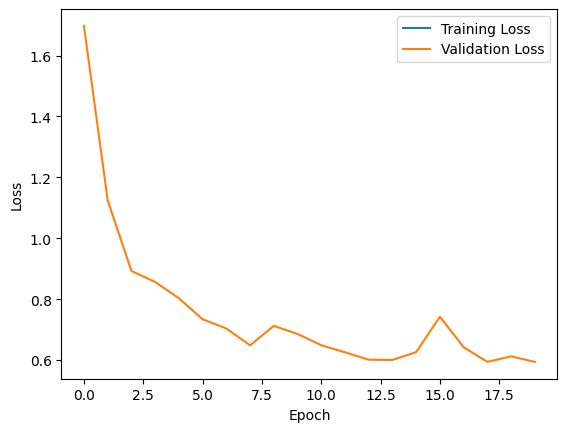

Test Accuracy: 0.7819


In [ ]:
import numpy as np
import urllib.request
import gzip
import os
import matplotlib.pyplot as plt
from tqdm import tqdm  # Install tqdm library if not installed: pip install tqdm

# Helper function to download and extract the dataset
def download_and_extract(url, filename):
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url, filename)
    with gzip.open(filename, 'rb') as f:
        return np.frombuffer(f.read(), np.uint8, offset=16)

# Helper function to download and extract labels
def download_and_extract_labels(url, filename):
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url, filename)
    with gzip.open(filename, 'rb') as f:
        return np.frombuffer(f.read(), np.uint8, offset=8)

# URLs for the Fashion MNIST dataset
urls = {
    'train_images': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz',
    'train_labels': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz',
    'test_images': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz',
    'test_labels': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz'
}

# Download and extract all files
train_images = download_and_extract(urls['train_images'], 'train-images-idx3-ubyte.gz').reshape(-1, 28*28) / 255.0
train_labels = download_and_extract_labels(urls['train_labels'], 'train-labels-idx1-ubyte.gz')
test_images = download_and_extract(urls['test_images'], 't10k-images-idx3-ubyte.gz').reshape(-1, 28*28) / 255.0
test_labels = download_and_extract_labels(urls['test_labels'], 't10k-labels-idx1-ubyte.gz')

# Split the training set into training and validation sets
num_train = int(0.8 * len(train_images))
train_data, val_data = train_images[:num_train], train_images[num_train:]
train_labels, val_labels = train_labels[:num_train], train_labels[num_train:]


class MLP:
    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate=0.5, l2_reg=0.01):
        self.W1 = np.random.randn(input_size, hidden_sizes[0]) * 0.01
        self.b1 = np.zeros((1, hidden_sizes[0]))
        self.W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) * 0.01
        self.b2 = np.zeros((1, hidden_sizes[1]))
        self.W3 = np.random.randn(hidden_sizes[1], output_size) * 0.01
        self.b3 = np.zeros((1, output_size))
        self.dropout_rate = dropout_rate
        self.l2_reg = l2_reg

    def forward(self, X, training=True):
        Z1 = np.dot(X, self.W1) + self.b1
        self.Z1 = Z1
        A1 = np.maximum(0, Z1)  # ReLU activation
        self.A1 = A1
        if training:
            U1 = np.random.rand(*A1.shape) < (1 - self.dropout_rate)
            A1 *= U1 / (1 - self.dropout_rate)  # Apply dropout during training

        Z2 = np.dot(A1, self.W2) + self.b2
        self.Z2 = Z2
        A2 = np.maximum(0, Z2)  # ReLU activation
        self.A2 = A2
        if training:
            U2 = np.random.rand(*A2.shape) < (1 - self.dropout_rate)
            A2 *= U2 / (1 - self.dropout_rate)  # Apply dropout during training

        Z3 = np.dot(A2, self.W3) + self.b3
        self.Z3 = Z3
        exp_scores = np.exp(Z3 - np.max(Z3, axis=1, keepdims=True))
        A3 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # Softmax activation
        self.A3 = A3
        return A3

    def backward(self, X, y, output, learning_rate=0.01):
        m = y.shape[0]
        grad_Z3 = output
        grad_Z3[range(m), y] -= 1
        grad_Z3 /= m

        grad_W3 = np.dot(self.A2.T, grad_Z3) + self.l2_reg * self.W3
        grad_b3 = np.sum(grad_Z3, axis=0, keepdims=True)
        grad_A2 = np.dot(grad_Z3, self.W3.T)
        grad_Z2 = grad_A2 * (self.Z2 > 0)
        grad_W2 = np.dot(self.A1.T, grad_Z2) + self.l2_reg * self.W2
        grad_b2 = np.sum(grad_Z2, axis=0, keepdims=True)
        grad_A1 = np.dot(grad_Z2, self.W2.T)
        grad_Z1 = grad_A1 * (self.Z1 > 0)
        grad_W1 = np.dot(X.T, grad_Z1) + self.l2_reg * self.W1
        grad_b1 = np.sum(grad_Z1, axis=0, keepdims=True)

        self.W1 -= learning_rate * grad_W1
        self.b1 -= learning_rate * grad_b1
        self.W2 -= learning_rate * grad_W2
        self.b2 -= learning_rate * grad_b2
        self.W3 -= learning_rate * grad_W3
        self.b3 -= learning_rate * grad_b3

    def predict(self, X):
        output = self.forward(X, training=False)
        return np.argmax(output, axis=1)

# Loss function: Cross entropy loss
def cross_entropy_loss(y, output):
    m = y.shape[0]
    print(m)
    log_likelihood = -np.log(output[range(m), y] + 1e-9)
    loss = np.sum(log_likelihood) / m
    return loss

# One-hot encode the labels
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

# Convert labels to one-hot encoding
train_labels_one_hot = one_hot(train_labels, 10)
val_labels_one_hot = one_hot(val_labels, 10)

def train(model, train_data, train_labels, val_data, val_labels, epochs=10, batch_size=32, learning_rate=0.01):
    training_losses = []
    validation_losses = []
    n_batches = train_data.shape[0] // batch_size
    for epoch in range(epochs):
        permutation = np.random.permutation(train_data.shape[0])
        train_data = train_data[permutation]
        train_labels = train_labels[permutation]

        epoch_loss = 0
        for i in tqdm(range(0, train_data.shape[0], batch_size), total=n_batches, desc=f'Epoch {epoch+1}/{epochs}'):
            X_batch = train_data[i:i+batch_size]
            y_batch = train_labels[i:i+batch_size]

            output = model.forward(X_batch)
            model.backward(X_batch, y_batch, output, learning_rate)
            epoch_loss += cross_entropy_loss(y_batch, output)

        train_loss = epoch_loss / n_batches
        training_losses.append(train_loss)

        val_output = model.forward(val_data, training=False)
        val_loss = cross_entropy_loss(val_labels, val_output)
        validation_losses.append(val_loss)

        val_accuracy = np.mean(model.predict(val_data) == val_labels)

        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # Plot training vs validation loss
    plt.plot(training_losses, label='Training Loss')
    plt.plot(validation_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Hyperparameters
input_size = 28 * 28
hidden_sizes = [256, 128]
output_size = 10
epochs = 20
learning_rate = 0.01
dropout_rate = 0.5
l2_reg = 0.01

def preprocess_images(images):
    return images.reshape(-1, 28 * 28) / 255.0

# Instantiate and train the model
model = MLP(input_size, hidden_sizes, output_size, dropout_rate, l2_reg)
train(model, train_data, train_labels, val_data, val_labels, epochs=epochs, learning_rate=learning_rate)

# Test the model
test_output = model.forward(test_images, training=False)
test_accuracy = np.mean(model.predict(test_images) == test_labels)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Saving the model
def save_model(model, filename):
    np.savez(filename, W1=model.W1, b1=model.b1, W2=model.W2, b2=model.b2, W3=model.W3, b3=model.b3)

save_model(model, 'mlp_model_complex_updated.npz')

In [ ]:
# Loss function: Cross entropy loss
def cross_entropy_loss(y, output):
    m = y.shape[0]
    print(m)
    log_likelihood = -np.log(output[range(m), y] + 1e-9)
    loss = np.sum(log_likelihood) / m
    return loss

val_loss = cross_entropy_loss(val_labels, val_output)

- sigma class 1 - 10 , sigma prob (yi*log(pi))

# Part 3 - CNN Implementation

In [ ]:
import numpy as np
from torchvision import datasets, transforms, utils
import matplotlib.pyplot as plt

# Types of fashion items in the
def image_label(label):
    IMAGE_LABEL_MAP = {
                 0: 'T-shirt/Top',
                 1: 'Trouser',
                 2: 'Pullover',
                 3: 'Dress',
                 4: 'Coat',
                 5: 'Sandal',
                 6: 'Shirt',
                 7: 'Sneaker',
                 8: 'Bag',
                 9: 'Ankle Boot'
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return IMAGE_LABEL_MAP[input]


train_dataset = datasets.FashionMNIST('./data', download=True,
                    transform=transforms.Compose([transforms.ToTensor()]))
test_dataset = datasets.FashionMNIST('./data', download=True, train=False,
                    transform=transforms.Compose([transforms.ToTensor()]))


a.size(): torch.Size([10, 1, 28, 28])
len(train_set): 60000
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])
labels:  Ankle Boot, T-shirt/Top, T-shirt/Top, Dress, T-shirt/Top, Pullover, Sneaker, Pullover, Sandal, Sandal, 

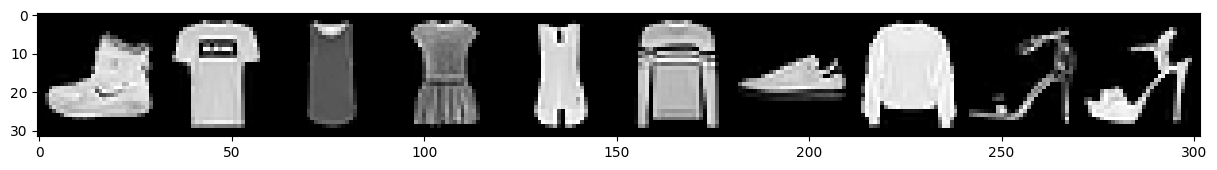

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=10)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10)

print(f'a.size(): {(next(iter(train_loader)))[0].size()}')
print(f'len(train_set): {len(train_dataset)}')

# image, label = next(iter(train_dataset))
# plt.imshow(image.squeeze(), cmap='gray')
# print(image_label(label))

batch = next(iter(train_loader))
train_images, train_labels = batch
print(type(train_images), type(train_labels))
print(train_images.shape, train_labels.shape)

grid = utils.make_grid(train_images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print('labels: ', end=' ')
for i, label in enumerate(train_labels):
    print(image_label(label), end=', ')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split

# Use GPU, if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

        self.fc1 = nn.Linear(512 * 1 * 1, 128)  # Adjust the input dimension
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        print(f'x.shape: {x.shape}')
        print(f'x: {x}')
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))
        x = self.pool(self.relu(self.conv5(x)))

        x = x.view(x.size(0), -1)  # Flatten the tensor

        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def initialize_weights(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
    elif isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')


# Initialize the model
model = CNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize CNN model weights
model.apply(initialize_weights)


################################################################################
# this is where we are having issue in running this CNN
# we need to reshape the input to a shape compatible to the entry point of our CNN

train_dataset = []
for i in range(len(train_data)):
   train_dataset.append([train_data[i], train_labels[i]])
val_dataset = []
for i in range(len(val_data)):
   val_dataset.append([val_data[i], val_labels[i]])
test_dataset = []
for i in range(len(test_images)):
   test_dataset.append([test_images[i], test_labels[i]])

# Load dataset
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        print(f'images: {images}')
        outputs = model(images.type(torch.FloatTensor))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}')

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_accuracy = 100 * correct / total
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.2f}%')

# Testing the model
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
test_accuracy = 100 * correct / total
print(f'Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%')


images: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
x.shape: torch.Size([64, 784])
x: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [64, 784]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split

train_data_reshaped = np.reshape(train_data, (48000, 1, 28, 28))
val_data_reshaped = np.reshape(val_data, (12000, 1, 28, 28))
test_images_reshaped = np.reshape(test_images, (10000, 1, 28, 28))
train_dataset = []
for i in range(len(train_data_reshaped)):
    # train_dataset.append(torch.utils.data.TensorDataset(torch.tensor(train_data_reshaped[i]).to(device), torch.tensor(train_labels[i]).to(device)))
    train_dataset.append([train_data_reshaped[i], train_labels[i]])
val_dataset = []
for i in range(len(val_data_reshaped)):
   val_dataset.append([val_data_reshaped[i], val_labels[i]])
test_dataset = []
for i in range(len(test_images_reshaped)):
   test_dataset.append([test_images_reshaped[i], test_labels[i]])

# Load dataset
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


for X, y in train_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

for X, y in val_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

for X, y in test_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.uint8
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.uint8
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.uint8


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split

# Use GPU, if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 1, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(28*28, 128)  # Adjust the input dimension
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # print(f'x.shape: {x.shape}')
        # print(f'x: {x}')
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        # x = self.pool(self.relu(self.conv3(x)))
        # x = self.pool(self.relu(self.conv4(x)))
        # x = self.pool(self.relu(self.conv5(x)))

        # x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.flatten(x)

        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def initialize_weights(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
    elif isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')


# Initialize the model
model = CNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize CNN model weights
model.apply(initialize_weights)


################################################################################
# this is where we are having issue in running this CNN
# we need to reshape the input to a shape compatible to the entry point of our CNN

train_data_reshaped = np.reshape(train_data, (48000, 1, 28, 28))
val_data_reshaped = np.reshape(val_data, (12000, 1, 28, 28))
test_images_reshaped = np.reshape(test_images, (10000, 1, 28, 28))
train_dataset = []
for i in range(len(train_data_reshaped)):
   train_dataset.append([train_data_reshaped[i], train_labels[i]])
val_dataset = []
for i in range(len(val_data_reshaped)):
   val_dataset.append([val_data_reshaped[i], val_labels[i]])
test_dataset = []
for i in range(len(test_images_reshaped)):
   test_dataset.append([test_images_reshaped[i], test_labels[i]])

# Load dataset
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        # print(f'images: {images}')
        outputs = model(images.type(torch.FloatTensor))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}')

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_accuracy = 100 * correct / total
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.2f}%')

# Testing the model
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
test_accuracy = 100 * correct / total
print(f'Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%')


Epoch 1/10, Loss: 0.5180


RuntimeError: Input type (double) and bias type (float) should be the same

**Neural network optimization**

In [ ]:
import numpy as np


class DenseLayer:
    def __init__(self, input_dim, output_dim, activation, lambda_reg=0.1, reg_type=None):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.weights = np.random.randn(input_dim, output_dim)* 0.01
        self.biases =  np.zeros((1, output_dim))
        self.activation_name =activation
        self.lambda_reg = lambda_reg
        self.output = None
        self.input = None
        self.reg_type = reg_type

        if activation == 'relu':
            self.activation = self.relu
            self.activation_prime = self.relu_prime
        elif activation == 'sigmoid':
            self.activation = self.sigmoid
            self.activation_prime = self.sigmoid_prime
        elif activation == 'softmax':
            self.activation = self.softmax
            self.activation_prime = self.softmax_prime
        else:
            raise ValueError('activation function is not defined')

    def __str__(self):
        return f"""DenseLayer(input_dim:{self.input_dim}, output_dim:{self.output_dim}, activation:{self.activation_name})"""

    def forward(self, input_data):
        self.input = input_data
        #print(f"self.input: {self.input.shape} \n self.weights {self.weights.shape}")
        Z = np.dot(self.input, self.weights) + self.biases
        #print("Z ", Z.shape)
        self.output = self.activation(Z)
        #print(f"set..... self.output {self.output.shape}")
        return self.output

    def backward(self, dA,learning_rate, y=None):
        """Backward propagate through this layer.
        dA is the derivative of the loss with respect to the output of this layer.
        y is the true labels, which is only needed if this is an output layer with softmax activation.
        """
        #print(f"self.output {self.output.shape}")
        if self.activation_name == 'softmax':
            y_one_hot = np.zeros_like(self.output)
            y_one_hot[np.arange(len(y)), y] = 1
            # Calculate the derivative of the loss with respect to the softmax inputs
            dZ = (self.output - y_one_hot) / len(y)
        else:
            dZ = dA * self.activation_prime(self.output)

        dA_prev = np.dot(dZ, self.weights.T)
        dW = np.dot(self.input.T, dZ)
        db = np.sum(dZ, axis=0, keepdims=True)

        if self.reg_type:
            if self.reg_type.upper() == "L1":
                 #print("Using L1 regularization..")
                 weights_reg = self.lambda_reg * np.sign(self.weights)
                 biases_reg = self.lambda_reg * np.sign(self.biases)
            else:
                 #print("Using L2 regularization....")
                 weights_reg = self.lambda_reg * self.weights
                 biases_reg = self.lambda_reg * self.biases
            self.weights -= learning_rate * (dW + weights_reg)
            self.biases -= learning_rate * (db + biases_reg)
        else:
            #print("No regularization....")
            self.weights -= learning_rate * dW
            self.biases -= learning_rate * db

        return dA_prev

    def relu(self, x):
        return np.maximum(0, x)

    def relu_prime(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_prime(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    # Ref https://stackoverflow.com/questions/40575841/numpy-calculate-the-derivative-of-the-softmax-function
    def softmax(self,Z):
        exp_scores = np.exp(Z)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # Softmax activation

       # The derivative of the cross-entropy loss with respect to the input to the softmax is simply predictions - true_labels
    def softmax_prime(self,x):
        return 1
class NeuralNetwork:
    def __init__(self):
        self.layers = []
        self.history = {'train_loss': [], 'val_loss': [], 'train_acc':[], 'val_acc':[]}


    def add_layer(self, layer):
        self.layers.append(layer)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

    def cross_entropy_loss(self,y, output):
        m = y.shape[0]
        log_likelihood = -np.log(output[range(m), y] + 1e-9)
        loss = np.sum(log_likelihood) / m
        return loss

    def train(self, train_data, train_labels, val_data, val_labels, epochs=10, batch_size=64, learning_rate=0.01):
      for epoch in range(epochs):
        permutation = np.random.permutation(train_data.shape[0])
        train_data = train_data[permutation]
        train_labels = train_labels[permutation]
        for i in range(0, train_data.shape[0], batch_size):
          X_batch = train_data[i:i+batch_size]
          y_batch = train_labels[i:i+batch_size]
          output = self.forward(X_batch)
          self.backward(output, learning_rate, y_batch)
        train_loss = self.cross_entropy_loss(train_labels, self.forward(train_data))
        self.history['train_loss'].append(train_loss)

        val_output = self.forward(val_data)
        val_loss = self.cross_entropy_loss(val_labels, val_output)  # Use val_labels directly
        self.history['val_loss'].append(val_loss)

        val_accuracy = np.mean(self.predict(val_data) == val_labels)
        train_acc = np.mean(self.predict(train_data) == train_labels)
        self.history['train_acc'].append(train_acc)
        self.history['val_acc'].append(val_accuracy)
        print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    def backward(self,output, learning_rate, y_train_batch):
        for layer in reversed(self.layers):
            #print(layer)
            output = layer.backward(output, learning_rate,y_train_batch)

In [ ]:
import os
import gzip
import urllib.request
import numpy as np

# URL and data filename for the Fashion MNIST dataset
DATASET_BASE_URL = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com'
DATASET_BASE_FOLDER = './data/FashionMNIST/raw'
DATA_FILENAME = {
    'train_images': 'train-images-idx3-ubyte.gz',
    'train_labels': 'train-labels-idx1-ubyte.gz',
    'test_images': 't10k-images-idx3-ubyte.gz',
    'test_labels': 't10k-labels-idx1-ubyte.gz'
}

def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

# Helper function to download and extract the dataset
def download_and_extract(filename, is_image=False):
    if not os.path.exists('/'.join([DATASET_BASE_FOLDER, filename])):
        os.makedirs(DATASET_BASE_FOLDER, exist_ok=True)
        urllib.request.urlretrieve('/'.join([DATASET_BASE_URL, filename]),
                                   '/'.join([DATASET_BASE_FOLDER, filename]))
    filename = os.path.join(DATASET_BASE_FOLDER, filename)
    with gzip.open(filename, 'rb') as f:
        if (is_image):
            return np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28 * 28) / 255.0
        else:
            return np.frombuffer(f.read(), np.uint8, offset=8)

# Download and extract all files
train_images = download_and_extract(DATA_FILENAME['train_images'], is_image=True)
train_labels = download_and_extract(DATA_FILENAME['train_labels'])
test_images = download_and_extract(DATA_FILENAME['test_images'], is_image=True)
test_labels = download_and_extract(DATA_FILENAME['test_labels'])

# Split the training set into training and validation sets
num_train = int(0.8 * len(train_images))
train_data, val_data = train_images[:num_train], train_images[num_train:]
train_labels, val_labels = train_labels[:num_train], train_labels[num_train:]

print(f'Training data shape   : Images - {train_data.shape} | Labels - {train_labels.shape}')
print(f'Validation data shape : Images - {val_data.shape} | Labels - {val_labels.shape}')
print(f'Test data shape       : Images - {test_images.shape} | Labels - {test_labels.shape}')

# Convert labels to one-hot encoding
train_labels_one_hot = one_hot(train_labels, 10)
val_labels_one_hot = one_hot(val_labels, 10)
print(f"train_labels_one_hot: {train_labels_one_hot.shape}, val_labels_one_hot {val_labels_one_hot.shape}  ")
input_size = 28 * 28
hidden_size = 128
output_size = 10
epochs = 20
learning_rate = 0.01


Training data shape   : Images - (48000, 784) | Labels - (48000,)
Validation data shape : Images - (12000, 784) | Labels - (12000,)
Test data shape       : Images - (10000, 784) | Labels - (10000,)
train_labels_one_hot: (48000, 10), val_labels_one_hot (12000, 10)  


In [ ]:

# Hyperparameters
input_size = 28 * 28
hidden_size = 100
output_size = 10
epochs = 100
learning_rate = 0.01

nn = NeuralNetwork()

nn.add_layer(DenseLayer(input_size, hidden_size, 'relu'))  #reg_type="L2" does not help
nn.add_layer(DenseLayer(hidden_size, hidden_size, 'relu'))  #reg_type="L2" does not help and sigmoid does not help
nn.add_layer(DenseLayer(hidden_size, output_size, 'softmax'))  #reg_type="L2" does not help
nn.train( train_data, train_labels, val_data, val_labels, epochs=epochs, learning_rate=learning_rate)

Epoch 1, Training Loss: 2.2995, Validation Loss: 2.2996, Validation Accuracy: 0.1901
Epoch 2, Training Loss: 2.0874, Validation Loss: 2.0852, Validation Accuracy: 0.2384
Epoch 3, Training Loss: 1.2145, Validation Loss: 1.2089, Validation Accuracy: 0.5294
Epoch 4, Training Loss: 1.0090, Validation Loss: 0.9982, Validation Accuracy: 0.6085
Epoch 5, Training Loss: 0.8678, Validation Loss: 0.8620, Validation Accuracy: 0.6877
Epoch 6, Training Loss: 0.8156, Validation Loss: 0.8102, Validation Accuracy: 0.6803
Epoch 7, Training Loss: 0.7648, Validation Loss: 0.7577, Validation Accuracy: 0.7330
Epoch 8, Training Loss: 0.7274, Validation Loss: 0.7247, Validation Accuracy: 0.7472
Epoch 9, Training Loss: 0.6707, Validation Loss: 0.6708, Validation Accuracy: 0.7652
Epoch 10, Training Loss: 0.6239, Validation Loss: 0.6216, Validation Accuracy: 0.7762
Epoch 11, Training Loss: 0.6006, Validation Loss: 0.6036, Validation Accuracy: 0.7901
Epoch 12, Training Loss: 0.5660, Validation Loss: 0.5750, Valid

{'train_loss': [2.2995478582554223, 2.087394567150613, 1.214493654036126, 1.0090265428084353, 0.867794963020789, 0.8155946656448225, 0.7647632697768476, 0.7274362901630219, 0.6707184733623751, 0.6238823619895427, 0.6005689905118994, 0.5660281671481775, 0.556773259691518, 0.5407705021963517, 0.5398257185012457, 0.5129463564834227, 0.5143488249778014, 0.49364380192814694, 0.4823608885454465, 0.47448078407977445, 0.4710114342420121, 0.49147923218836725, 0.44855238572051714, 0.44656214871280675, 0.4440868438563864, 0.43206777879813396, 0.4198057170519255, 0.4242666696211396, 0.41148914027650507, 0.405459103958526, 0.4034612981603031, 0.3990988889836083, 0.39467874380596374, 0.38421156744574836, 0.3876289152968937, 0.3726945170476154, 0.3704313934221133, 0.3697011487521757, 0.3608868136900419, 0.3708431187454488, 0.3516289977866355, 0.3471122981449149, 0.3600589615872004, 0.3465224464052356, 0.35031131202454313, 0.3358453886909388, 0.3362838842118181, 0.33313579301552076, 0.3228195605584574

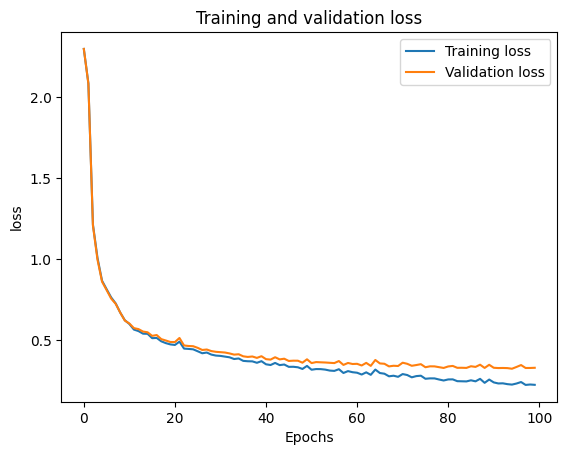

In [ ]:
import matplotlib.pyplot as plt

print(nn.history)
plt.plot(nn.history['train_loss'], label='Training loss')
plt.plot(nn.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

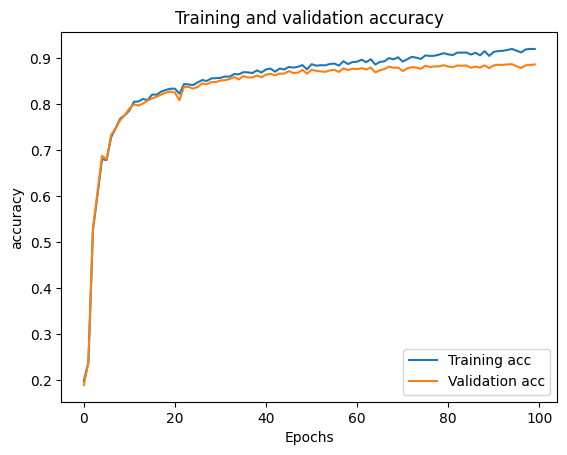

In [ ]:
import matplotlib.pyplot as plt

plt.plot(nn.history['train_acc'], label='Training acc')
plt.plot(nn.history['val_acc'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Final integration in progress
points yet to be addressed-
1. review the data downloading, loading, pre-processing to conclude on implementation fully-inline with assignment text.
2. adding of data to this page in sections OR to other pages - highlighting the experiments we did wrt model architecture, and the observations/outcomes.
3. Question 3.c - experiment with different weight initialization methods (random, Xavier, He)
4. Report preparation -
* explain the trials/experiments clearly.
* explain the architecture of the models, learning rate, epochs used for training, evaluation metrics and the instructions for running the models.
* add comparison of the performance of the models on the different hyperparameters you tried and justify the observed behavior.
* share the references

In [ ]:
# Import dependencies

# for MLP
import numpy as np

# for Pytorch based backbone CNN
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# PyTorch based flow to prepare and train a backbone CNN
########################################################
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)
# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

# Split the training data into Training and Validation datasets
training_data_subset_size = int(0.8 * len(training_data))
validate_data_subset_size = len(training_data) - training_data_subset_size
training_data_subset, validation_data_subset = random_split(training_data, [training_data_subset_size, validate_data_subset_size])

print(f'Complete Training Data: {training_data.size}')

# define batch-size to load data
batch_size = 64
# define num of epochs to be run for training
epochs = 10

# Create data loaders.
train_dataloader = DataLoader(training_data_subset, batch_size=batch_size)
validate_dataloader = DataLoader(validation_data_subset, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# for X, y in test_dataloader:
#     print(f"Shape of X [N, C, H, W]: {X.shape}")
#     print(f"Shape of y: {y.shape} {y.dtype}")
#     break

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

##################################################
# Define backbone CNN model for feature extraction
##################################################
class BackboneNeuralNetwork(nn.Module):
    def __init__(self, backbone_only=False):
        super().__init__()
        # this property helps the CNN transition from a full-fledged network to a backbone CNN
        # the default value is False - meaning an object of this class can be used to predict the labels for Fashion-MNIST dataset
        # if the value is set to True - an object of this class will return the flattened output from conv layers - thus acting as a backbone
        self.backbone_only = backbone_only
        self.flatten = nn.Flatten()
        self.convolutional_relu_stack = nn.Sequential(
            # Build a small CNN model consisting of 5 convolution layers.
            # Each convolution layer would be followed by a ReLU activation and a max pooling layer
            #
            # ref - https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html
            # nn.Sequential()
            #
            # ref - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d
            # nn.Conv2d(
            #     in_channels = number of layers in input images. Grayscale or monochrome images have 1 in_channels
            #     out_channels = number of channels in the output produced. This is a hyperparameter, which signifies the number of kernels
            #     kernel_size = `(m,n)` for a kernel/filter dimension, or simply n for a square (n,n) kernel/filter dimension
            #     stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None are other properties with default values
            # )
            #
            # ref - https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU
            # nn.ReLU()
            #
            # ref - https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d
            # nn.MaxPool2d(
            #     kernel_size = `(m,n)` for a kernel/filter dimension, or simply n for a square (n,n) kernel/filter dimension
            #     stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False are other properties with default values
            # )
            nn.Conv2d(1, 49, (3, 3), stride=(1, 1), padding=(1, 1)),    # input = (1,28,28), output = ()
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),                                       # input = (), output = ()
            nn.Conv2d(49, 98, (2, 2), stride=(1, 1), padding=(1,1)),    # input = (), output = ()
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),                                       # input = (), output = ()
            nn.Conv2d(98, 196, (2, 2), stride=(1, 1), padding=(1,1)),   # input = (), output = ()
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),                                       # input = (), output = ()
            nn.Conv2d(196, 392, (2, 2), stride=(1, 1), padding=(1, 1)), # input = (), output = ()
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),                                       # input = (), output = ()
            nn.Conv2d(392, 784, (2, 2), stride=(1, 1), padding=(1, 1)), # input = (), output = ()
            nn.ReLU(),
            nn.MaxPool2d((2, 2))                                        # input = (), output = (784,1,1)
        )
        self.linear_relu_stack = nn.Sequential(
            #
            # After extracting feature from CNN model use MLP for classification
            #
            # ref - https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
            # nn.Linear(
            #     in_features = size of each input sample
            #     out_features = size of each output sample
            #     bias=True, device=None, dtype=None are other properties with default values
            # )
            #
            # ref - https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax
            # nn.Softmax()
            #
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x1 = self.convolutional_relu_stack(x)
        x2 = self.flatten(x1)
        if self.backbone_only:  # return the flattened tensor containing feature extraction data
            return x2
        # default behaviour is to return the predicted labels
        x3 = self.linear_relu_stack(x2)
        return x3
##################################################

# create model instance
model = BackboneNeuralNetwork().to(device)
# print(model)

# define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# forward pass implementation
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        optimizer.zero_grad()
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


# validation implementation
def validate(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    validation_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            validation_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    validation_loss /= num_batches
    correct /= size
    print(f"Validation Phase: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {validation_loss:>8f} \n")

# testing implementation
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Phase: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# Train and Validate the CNN
print("Training the backbone CNN model")
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    validate(validate_dataloader, model, loss_fn)
print("Done!")

# Save the model
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch CNN backbone model state to model.pth")

# Load the model to perform testing on the trained variables
model = BackboneNeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

# Test with the model
test(test_dataloader, model, loss_fn)

#####################################
# Once the backbone model is prepared, trained, and tested,
# start the integration of backbone model with custom MLP

#####################################
# Define MLP model for classification
#####################################
# Define a class to represent dense layer
class DenseLayer:
    def __init__(self, input_dim, output_dim, activation, lambda_reg=0.1, reg_type=None):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.weights = np.random.randn(input_dim, output_dim)* 0.01
        self.biases =  np.zeros((1, output_dim))
        self.activation_name =activation
        self.lambda_reg = lambda_reg
        self.output = None
        self.input = None
        self.reg_type = reg_type

        if activation == 'relu':
            self.activation = self.relu
            self.activation_prime = self.relu_prime
        elif activation == 'sigmoid':
            self.activation = self.sigmoid
            self.activation_prime = self.sigmoid_prime
        elif activation == 'softmax':
            self.activation = self.softmax
            self.activation_prime = self.softmax_prime
        else:
            raise ValueError('activation function is not defined')

    def __str__(self):
        return f"""DenseLayer(input_dim:{self.input_dim}, output_dim:{self.output_dim}, activation:{self.activation_name})"""

    def forward(self, input_data):
        self.input = input_data
        #print(f"self.input: {self.input.shape} \n self.weights {self.weights.shape}")
        Z = np.dot(self.input, self.weights) + self.biases
        #print("Z ", Z.shape)
        self.output = self.activation(Z)
        #print(f"set..... self.output {self.output.shape}")
        return self.output

    def backward(self, dA, learning_rate, y=None):
        """Backward propagate through this layer.
        dA is the derivative of the loss with respect to the output of this layer.
        y is the true labels, which is only needed if this is an output layer with softmax activation.
        """
        #print(f"self.output {self.output.shape}")
        if self.activation_name == 'softmax':
            y_one_hot = np.zeros_like(self.output)
            y_one_hot[np.arange(len(y)), y] = 1
            # Calculate the derivative of the loss with respect to the softmax inputs
            dZ = (self.output - y_one_hot) / len(y)
        else:
            dZ = dA * self.activation_prime(self.output)

        dA_prev = np.dot(dZ, self.weights.T)
        dW = np.dot(self.input.T, dZ)
        db = np.sum(dZ, axis=0, keepdims=True)

        if self.reg_type:
            if self.reg_type.upper() == "L1":
                 #print("Using L1 regularization..")
                 weights_reg = self.lambda_reg * np.sign(self.weights)
                 biases_reg = self.lambda_reg * np.sign(self.biases)
            else:
                 #print("Using L2 regularization....")
                 weights_reg = self.lambda_reg * self.weights
                 biases_reg = self.lambda_reg * self.biases
            self.weights -= learning_rate * (dW + weights_reg)
            self.biases -= learning_rate * (db + biases_reg)
        else:
            #print("No regularization....")
            self.weights -= learning_rate * dW
            self.biases -= learning_rate * db

        return dA_prev

    def relu(self, x):
        return np.maximum(0, x)

    def relu_prime(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_prime(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    # Ref https://stackoverflow.com/questions/40575841/numpy-calculate-the-derivative-of-the-softmax-function
    def softmax(self,Z):
        exp_scores = np.exp(Z)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # Softmax activation

    # The derivative of the cross-entropy loss with respect to the input to the softmax is simply predictions - true_labels
    def softmax_prime(self,x):
        return 1

# Define a class to represent MLP
class MLP:
    def __init__(self):
        self.layers = []
        self.history = {'train_loss': [], 'val_loss': [], 'train_acc':[], 'val_acc':[]}

    def add_layer(self, layer):
        self.layers.append(layer)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

    def cross_entropy_loss(self,y, output):
        m = y.shape[0]
        log_likelihood = -np.log(output[range(m), y] + 1e-9)
        loss = np.sum(log_likelihood) / m
        return loss

    def train(self, train_data, train_labels, val_data, val_labels, epochs=10, batch_size=64, learning_rate=0.01):
        for epoch in range(epochs):
            permutation = np.random.permutation(train_data.shape[0])
            train_data = train_data[permutation]
            train_labels = train_labels[permutation]
            for i in range(0, train_data.shape[0], batch_size):
                X_batch = train_data[i:i+batch_size]
                y_batch = train_labels[i:i+batch_size]
                output = self.forward(X_batch)
                self.backward(output, learning_rate, y_batch)
            train_loss = self.cross_entropy_loss(train_labels, self.forward(train_data))
            self.history['train_loss'].append(train_loss)

            val_output = self.forward(val_data)
            val_loss = self.cross_entropy_loss(val_labels, val_output)  # Use val_labels directly
            self.history['val_loss'].append(val_loss)

            val_accuracy = np.mean(self.predict(val_data) == val_labels)
            train_acc = np.mean(self.predict(train_data) == train_labels)
            self.history['train_acc'].append(train_acc)
            self.history['val_acc'].append(val_accuracy)
            print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    def backward(self,output, learning_rate, y_train_batch):
        for layer in reversed(self.layers):
            #print(layer)
            output = layer.backward(output, learning_rate,y_train_batch)
#####################################

# define the MLP architecture
input_size = 28 * 28
hidden_size = 128
output_size = 10

# create the instance of MLP
mlp = MLP()
mlp.add_layer(DenseLayer(input_size, hidden_size, 'relu'))      #reg_type="L2" does not help
mlp.add_layer(DenseLayer(hidden_size, output_size, 'softmax'))  #reg_type="L2" does not help

# train the MLP using features extracted from pre-trained backbone
def feature_extraction(dataloader, model):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    features = np.empty((size, 28*28), dtype=np.float64)
    labels = np.empty((size), dtype=np.int64)
    model.eval()
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            pred = model(X)
            features[(batch*batch_size):((batch+1)*batch_size)] = pred.numpy()  # extract the features in numpy arrays
            labels[(batch*batch_size):((batch+1)*batch_size)] = y.numpy()       # extract the features in numpy arrays
    return features, labels

# create the instance of `backbone CNN model`
backbone_model = BackboneNeuralNetwork(backbone_only=True).to(device)
backbone_model.load_state_dict(torch.load("model.pth"))

# extract the features using backbone CNN
classifier_train_data, classifier_train_labels = feature_extraction(train_dataloader, backbone_model)
classifier_validation_data, classifier_validation_labels = feature_extraction(validate_dataloader, backbone_model)

# let the MLP classify the data now based on feature-extracted dataset
epochs = 1
learning_rate = 0.01
print("Training the classigication MLP model")
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    mlp.train(classifier_train_data, classifier_train_labels, classifier_validation_data, classifier_validation_labels)


Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Using cpu device
BackboneNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (convolutional_relu_stack): Sequential(
    (0): Conv2d(1, 49, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(49, 98, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(98, 196, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(196, 392, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(392, 784, kernel_